# Medical Cost Personal Insurance Project

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading data set
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This is the dataset of medical Cost Personal Insurance. It is consist of 1338 rows and 7 columns. Out of 7 column the column "charges" is the label and all other columns are considered as features. our interest is to predict insurance charges based on features/ inputs. Feature columns are age, sex, bmi, children, smoker, region.

In [3]:
# Checking the column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


by df.info() method we can notice that dataset class is pandas dataframe type consist of 1338 entities from index no 0 to 1337. datatype of each columns are as it should be. i.e. age is int64 data type, sex is objective datatype, bmi is float data type because it is continuous data. children is integer data type as it is countiong data, smoker is objective data as it is yes no categotical data, region is objective data type, and lastly charges is float data type as it is continuous data.
in Non-Null Count column it is noticed that no of not null data in each column is same as the no of entities hence there is no missing data present.
lastly we have no of objective data is 3, no of integer data is 2 and no of float data is 2. memory utilised for this dataset is 73.3+ KB.

In [5]:
# Checking for null value.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing data in the data set.

<AxesSubplot:>

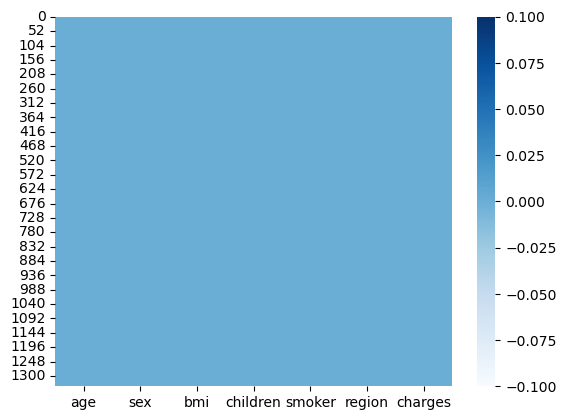

In [6]:
# Visualize presence of null value
sns.heatmap(df.isnull(),cmap='Blues')

In [7]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

df[column name].value_counts() give us the each unique value with its counting.
hare we can notice that for the categorical column, sex no of male and female person are almost same. in region column we can notice that region is subdevided into 4 region and no of person having medical insuarance is almost same in each region.

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


df.describe method returns the stastical descriptive summaryof the dataset. 
1. count for each numerical column is same. i.e. there is no missing value.
2. mean and median is almost same in each column except charges column.
3. in bmi column there is huge difference between 75th percentile and maximum value as compared between 50th and 75th as well as 25th and 50th. hence there might have outliers.

In [13]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

in the age and bmi column it is clear that there is no skewness.
althow it shows there is skewness present in the column children and charges column. no of children is a descrete data which is count so skewness does no matter for this column.

### Data Visualisation

In [12]:
# detecting categorical column and numerical column
categorical_col=[]
numerical_col=[]
for i in df.columns:
    if df[i].dtypes=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print("Categorical Columns are: ", categorical_col)
print("Numerical Columns are: ", numerical_col)

Categorical Columns are:  ['sex', 'smoker', 'region']
Numerical Columns are:  ['age', 'bmi', 'children', 'charges']


### Univariate Analysis

male      676
female    662
Name: sex, dtype: int64


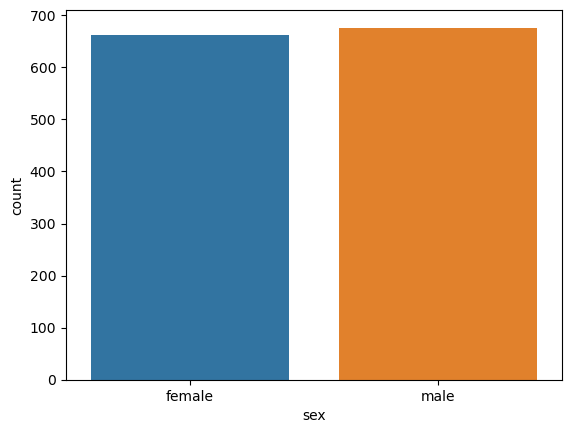

In [22]:
print(df['sex'].value_counts())
sns.countplot(data=df, x="sex")
plt.show()

There are almost same no of male and female coustomer.

no     1064
yes     274
Name: smoker, dtype: int64


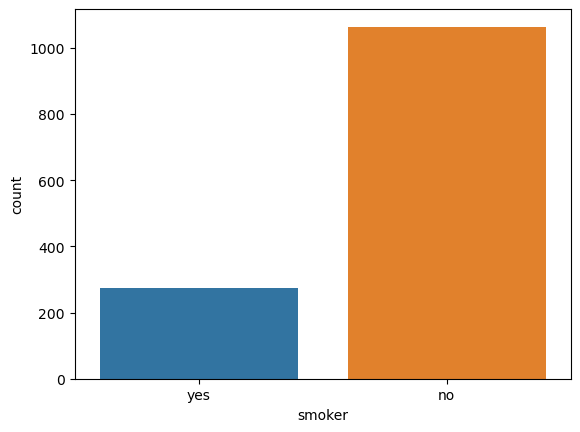

In [23]:
print(df['smoker'].value_counts())
sns.countplot(data=df, x='smoker')
plt.show()

There are non smoker person is larger than smoker person.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


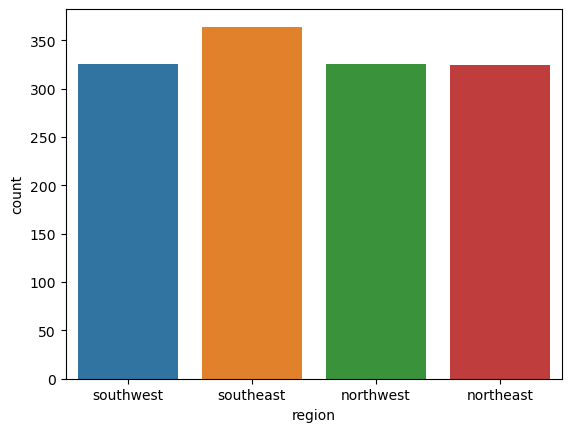

In [24]:
print(df.region.value_counts())
sns.countplot(data=df, x='region')
plt.show()

medical insurance customer is nearly same in every region. in southease region there are slightly higher customer base as compared to other column.

<AxesSubplot:xlabel='age', ylabel='Count'>

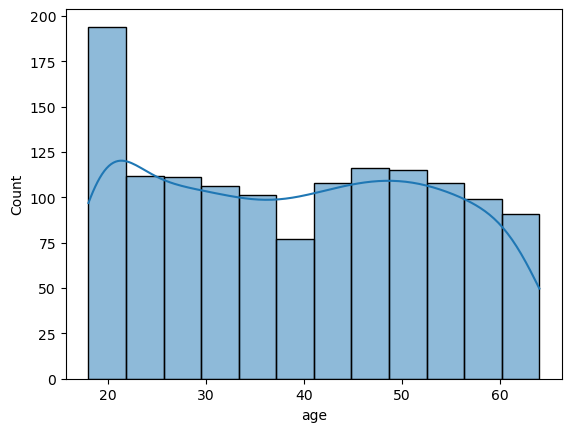

In [25]:
sns.histplot(data=df, x='age', kde=True, palette='light')

lower age group person are slightly high tendency to buy medical insurance. otherwise every age group person have nearly same tendency to buy medical insuance policy. 

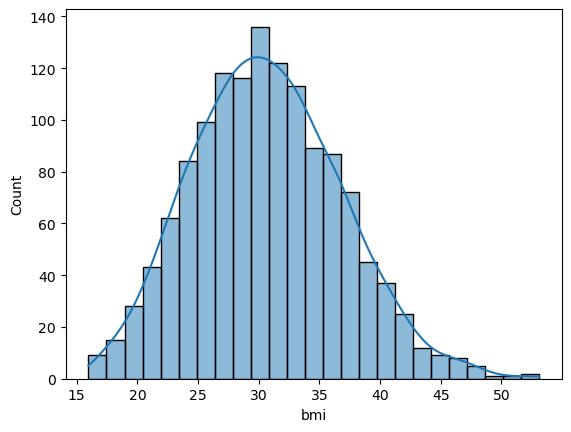

In [26]:
sns.histplot(data=df, x='bmi', kde=True)
plt.show()

bmi column is normally distributed. and most of the medical insurance coustomer have bmi approximately from 22 to 40 range.

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


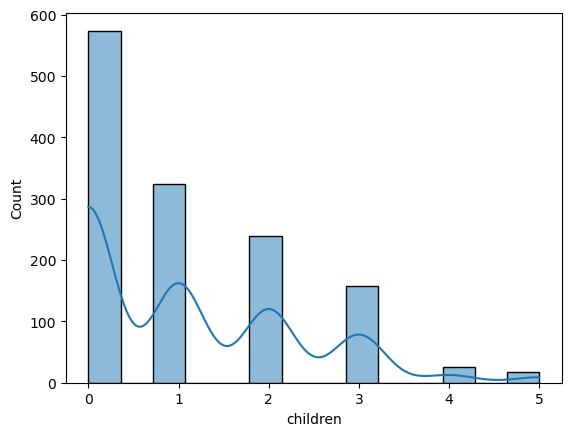

In [28]:
print(df.children.value_counts())
sns.histplot(data=df,x='children', kde=True)
plt.show()

 Most of the coustomer buy medical insurance those who have zero or less than 3 children.

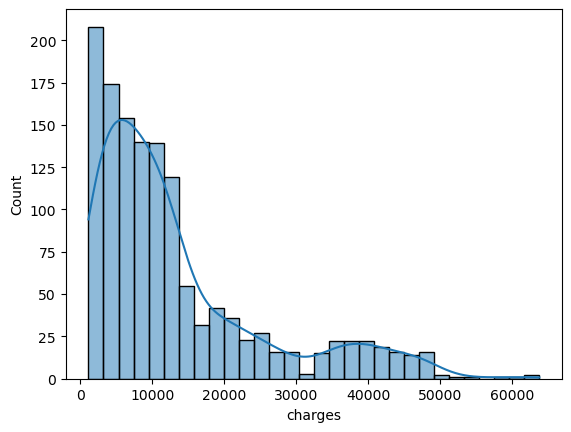

In [29]:
sns.histplot(data=df, x='charges', kde=True )
plt.show()

skewness is present in this kde graph. expences for medical insurance mostly lies in between 2000 to 25000 approximately.

### Bivariate Analysis

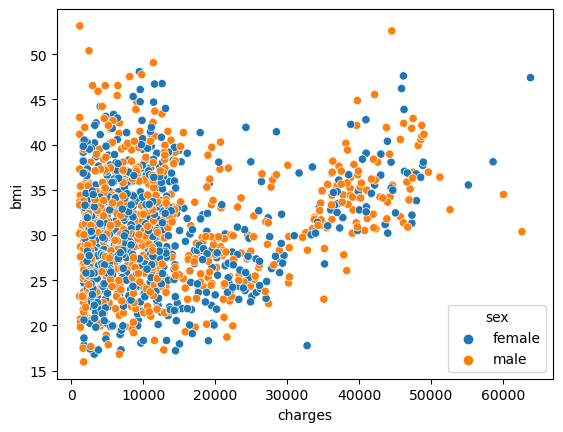

In [30]:
# checking for charges imposed based on bmi
sns.scatterplot(data=df, x='charges', y='bmi',hue='sex')
plt.show()

most of the coustomer spending charges for medical insurance is from 2000 to 20000 irrespective of sex and bmi rating.  

<AxesSubplot:xlabel='charges', ylabel='bmi'>

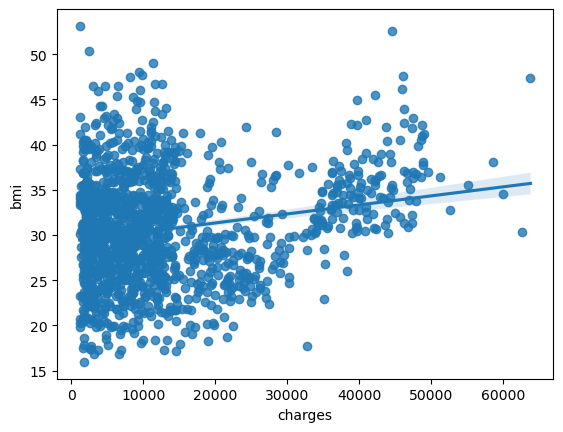

In [33]:
sns.regplot(data=df, x='charges',y='bmi')

slope of the best fit line is not high. which indicates based on bmi there is no such relation. 

<AxesSubplot:xlabel='sex', ylabel='charges'>

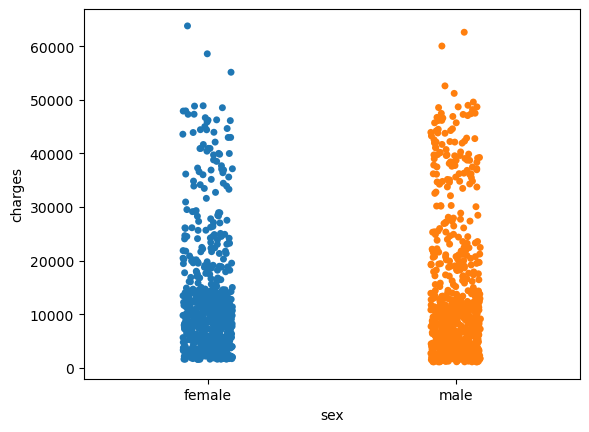

In [31]:
# Chacking charges based on sex
sns.stripplot(data=df, x='sex',y='charges')

almost same charges imposed irrespective of coustomer sex.

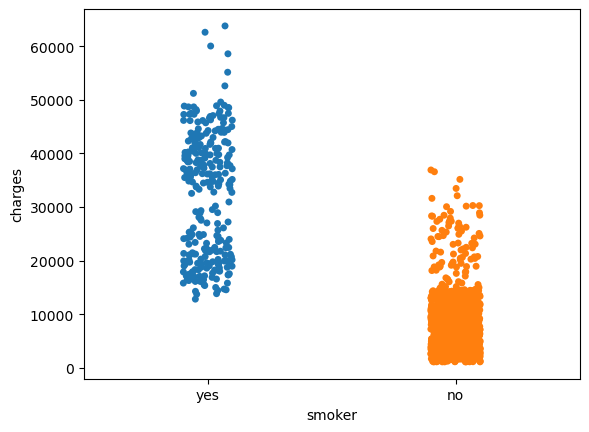

In [34]:
# chaking charges for the customer those who smoke.
sns.stripplot(data=df,x='smoker',y='charges')
plt.show()

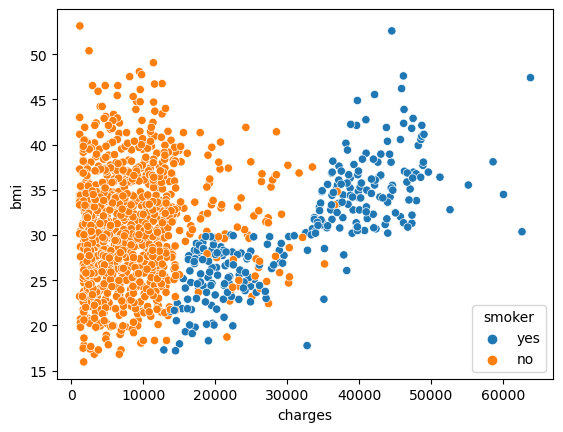

In [38]:
sns.scatterplot(data=df, x='charges', y='bmi',hue='smoker')
plt.show()

medical insurance charge imposed is higher for the smoker person compared with non smoker person.

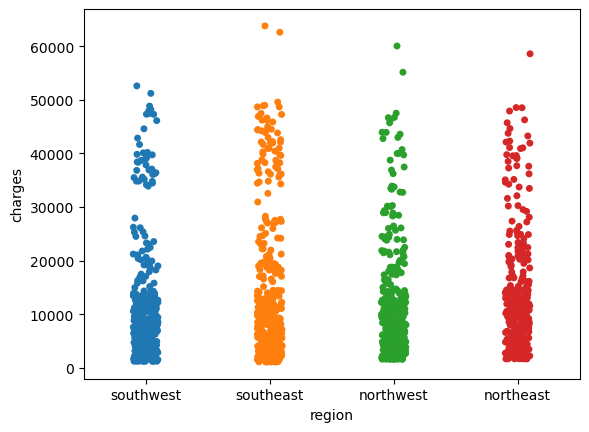

In [39]:
# Cgarges based on region
sns.stripplot(data=df, x='region', y='charges')
plt.show()

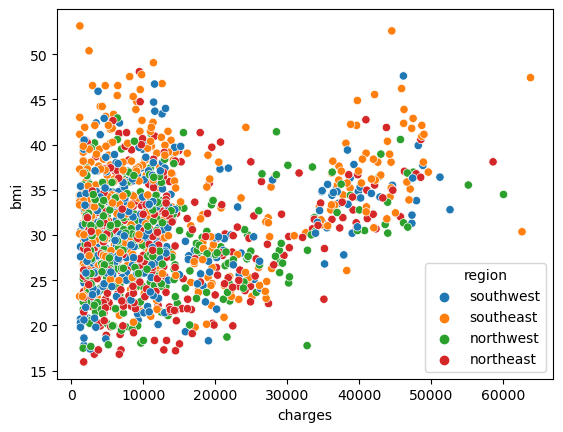

In [43]:
sns.scatterplot(data=df,x='charges', y='bmi', hue='region')
plt.show()

there is nothing conclusive based on region.

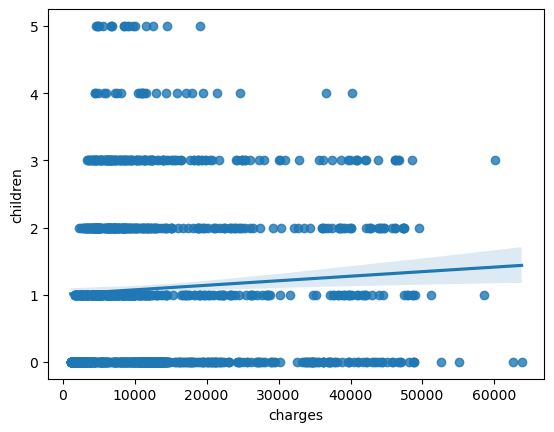

In [42]:
sns.regplot(data=df,x='charges',y='children')
plt.show()

Most of the medical insurance coustomer are having children 3 or less.

### Multivariate Analysis

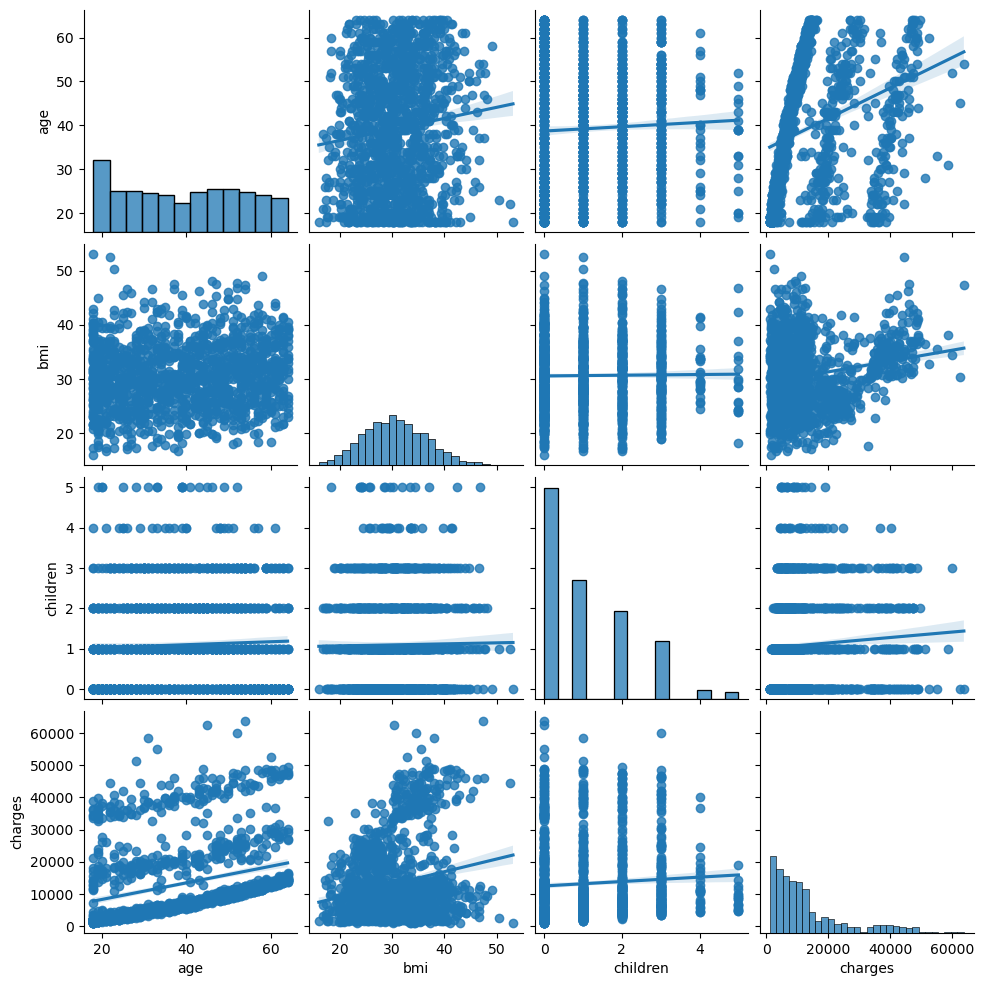

In [46]:
sns.pairplot(df, kind='reg')

observations: 
1. diagonal elements represents the histogram. where x axis shows their bins ans y axix shows the frequency of data.
    a. lower age customer of nearly 20 age are the most medical insurance holder.
    b. bmi is normaly distributed. most of the customer having bmi in the range of 25 to 40.
    c. those who doesnot have any children they are the most policy holder. and most of the customer having less than 3 children.
    d. charges column is right skewed column. which shows most of the policy holder are within 20000 units costs.
    
2. in age vs bmi plot regresion line slope is not high. i.e. age and bmi are not relatable with each other.
3. in age vs charges plot regression line slope is high positively i.e. for higher aged person medical charges imposed highly.
4. in charges vs bmi plot there is a positive relation found.

## Data Preprocessing

##### encoding categorical columns

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_col:
    df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


datatype of categorical columns is now changed to integer and marked as per label encoder.

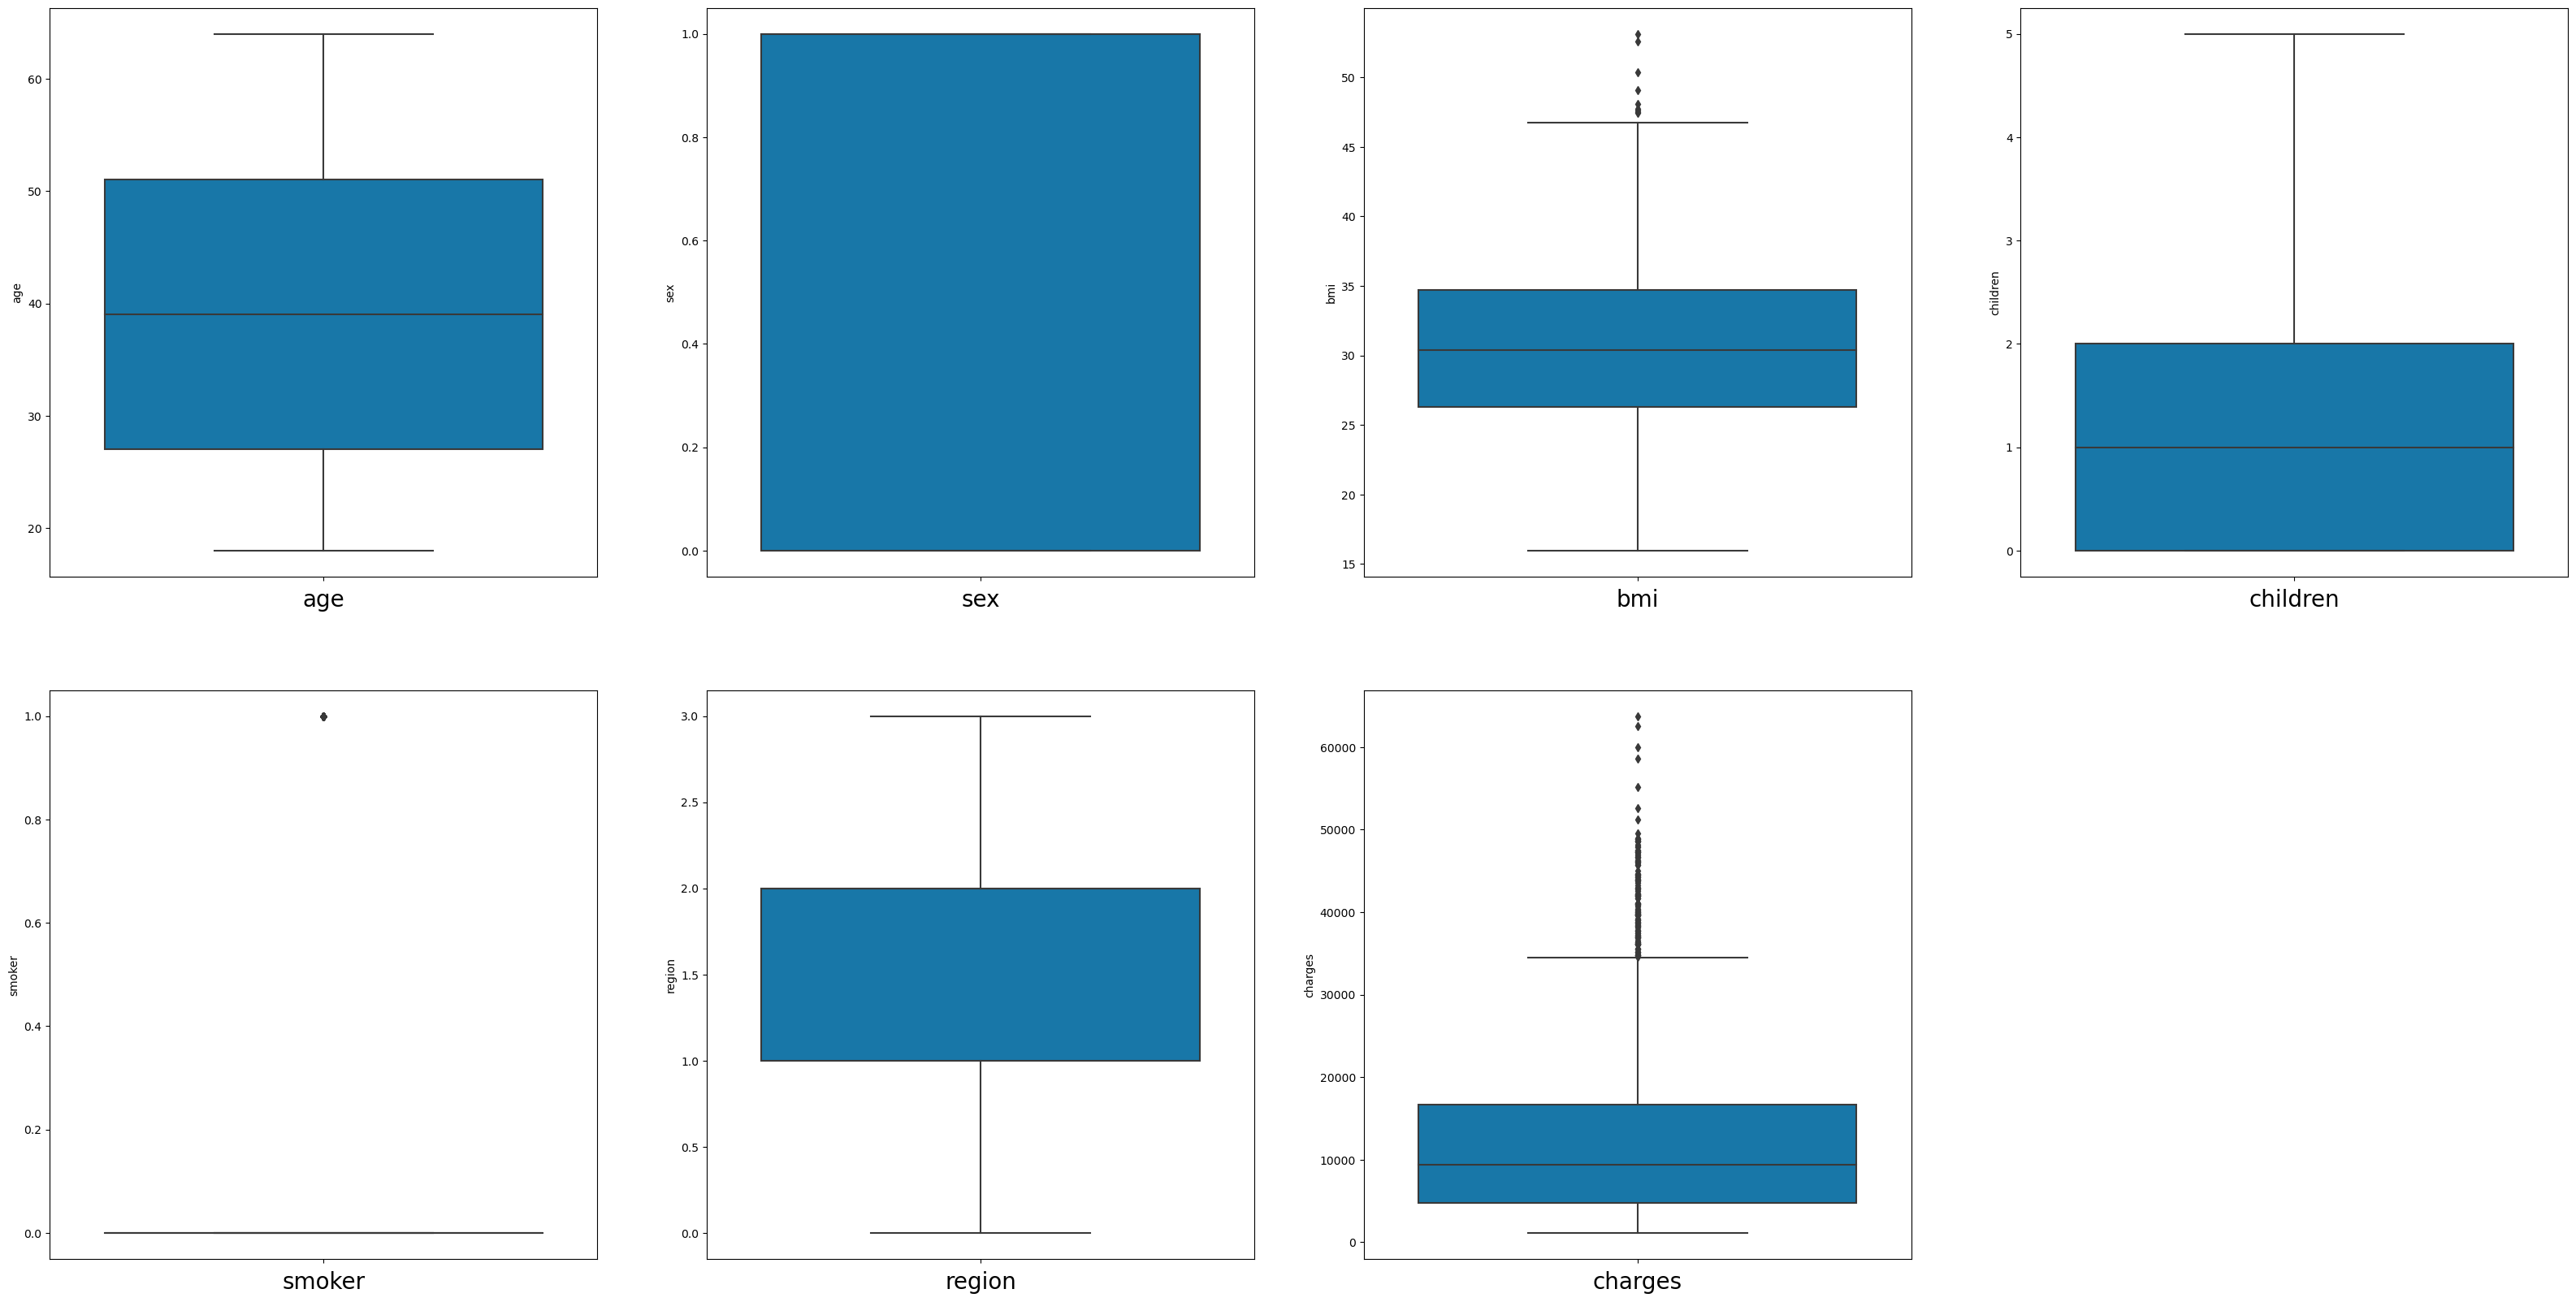

In [53]:
# checking for outliers
plt.figure(figsize=(40,20))
plotnumber=1
for i in df.columns:
    if plotnumber<=7:
        plt.subplot(2,4,plotnumber)
        sns.boxplot(data=df,y=df[i], palette='winter_r')
        plt.xlabel(i, fontsize=20)
    plotnumber+=1
plt.show()
    

There are no outliers present in feature columns but in label column outliers presents.

In [55]:
# Checking correlation of feature columns with label
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


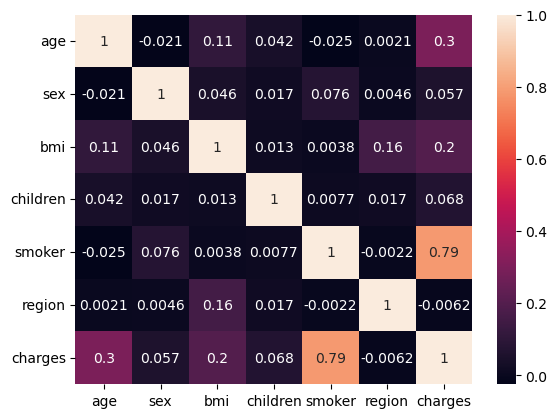

In [56]:
# Visualizing correlation of features columns with label/target variable
sns.heatmap(df.corr(), annot=True)
plt.show()

observations:
1. strong positive correlation in smoker vs charges columns.
2. other columns are not as much correlated to the charges columns (most of the columns are in darker side)

In [58]:
# Seperating features and label
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print("Shape of features: ", x.shape)
print("Shape of Label: ", y.shape)

Shape of features:  (1338, 6)
Shape of Label:  (1338,)


In [60]:
# Feature Scalling using Standard Scaling Technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


In [61]:
# Checking Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,age,1.015394
1,sex,1.008889
2,bmi,1.040608
3,children,1.002482
4,smoker,1.006466
5,region,1.025966


vif value of each columns is not more than 10. hence we do not need to drop any feature.

### Modeling

In [62]:
# importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [63]:
# Finding the best Random State
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    accu=r2_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print(f"Maximum r2score is {maxAccu} is at {maxRS}")

Maximum r2score is 0.8041576323426197 is at 112


In [64]:
#Spliting the dataset into train data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [67]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print(lr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_lr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_lr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_lr)))
print("r squared score=",r2_score(y_test,pred_lr))

LinearRegression()
Mean Absolute Error= 3916.5692655615812
Mean Squared Error= 29880673.55564114
Root Mean Squared Error= 5466.321757419804
r squared score= 0.8041576323426197


In [68]:
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print(ls)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_ls))
print("Mean Squared Error=", mean_squared_error(y_test,pred_ls))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_ls)))
print("r squared score=",r2_score(y_test,pred_ls))

Lasso()
Mean Absolute Error= 3916.4118419810015
Mean Squared Error= 29879482.82556864
Root Mean Squared Error= 5466.212841224593
r squared score= 0.8041654365641747


In [69]:
rg=Ridge()
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
print(rg)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_rg))
print("Mean Squared Error=", mean_squared_error(y_test,pred_rg))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_rg)))
print("r squared score=",r2_score(y_test,pred_rg))

Ridge()
Mean Absolute Error= 3918.2178490667775
Mean Squared Error= 29880652.86730107
Root Mean Squared Error= 5466.319865073857
r squared score= 0.80415776793707


In [70]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print(gbr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_gbr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_gbr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_gbr)))
print("r squared score=",r2_score(y_test,pred_gbr))

GradientBoostingRegressor()
Mean Absolute Error= 2188.2088228659527
Mean Squared Error= 13386089.91581753
Root Mean Squared Error= 3658.700577502555
r squared score= 0.9122655806969463


In [71]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print(rfr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_rfr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_rfr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_rfr)))
print("r squared score=",r2_score(y_test,pred_rfr))

RandomForestRegressor()
Mean Absolute Error= 2261.274635773718
Mean Squared Error= 15679437.060405474
Root Mean Squared Error= 3959.726892148684
r squared score= 0.8972346432644264


In [72]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
print(etr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_etr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_etr)))
print("r squared score=",r2_score(y_test,pred_etr))

ExtraTreesRegressor()
Mean Absolute Error= 2353.8912210242543
Mean Squared Error= 19074708.180612147
Root Mean Squared Error= 4367.460152149319
r squared score= 0.8749815326114214


In [73]:
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
pred_adr=adr.predict(x_test)
print(adr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_adr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_adr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_adr)))
print("r squared score=",r2_score(y_test,pred_adr))

AdaBoostRegressor()
Mean Absolute Error= 4240.238953829884
Mean Squared Error= 26012667.37927286
Root Mean Squared Error= 5100.261501067652
r squared score= 0.8295091186898986


In [74]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print(dtr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_dtr)))
print("r squared score=",r2_score(y_test,pred_dtr))

DecisionTreeRegressor()
Mean Absolute Error= 2287.5342227089554
Mean Squared Error= 29212884.185909443
Root Mean Squared Error= 5404.894465751338
r squared score= 0.8085344229467926


In [75]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print(svr)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error=", mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_svr)))
print("r squared score=",r2_score(y_test,pred_svr))

SVR()
Mean Absolute Error= 8523.47380438049
Mean Squared Error= 163733094.3828185
Root Mean Squared Error= 12795.823317896293
r squared score= -0.07313099244868915


In [76]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(knn)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred_knn))
print("Mean Squared Error=", mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error=",np.sqrt(mean_squared_error(y_test,pred_knn)))
print("r squared score=",r2_score(y_test,pred_knn))

KNeighborsRegressor()
Mean Absolute Error= 3017.257427708955
Mean Squared Error= 21917390.0007151
Root Mean Squared Error= 4681.6012218807255
r squared score= 0.8563501742148685


from all above the models we can notice that GradientBoostingRegressor() produces high r2score and monimum root means square error which refers the best performing model.

### Hyper Parameter Tuning

In [85]:
parameter={'alpha':[0.001,0.01,0.1],
           "loss":['squared_error','absolute_error'],
           'max_features':['sqrt','log2'],
           "max_depth":[1,10,20],
           'random_state':[maxRS,50,100]}
gsv=GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)
gsv.fit(x_train,y_train)
gsv.best_params_

{'alpha': 0.001,
 'loss': 'absolute_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'random_state': 100}

In [86]:
final_model=GradientBoostingRegressor(alpha=0.001,loss='absolute_error',max_depth=10,max_features='sqrt',random_state=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred))
print("Mean Squared Error =",mean_squared_error(y_test,pred))
print("Root Mean Squared Error =", np.sqrt(mean_squared_error(y_test,pred)))
print("R Squared Score", r2_score(y_test,pred))

Mean Absolute Error= 2128.218472414985
Mean Squared Error = 16082696.636573972
Root Mean Squared Error = 4010.323757076724
R Squared Score 0.8945916201735884


In [87]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("Mean Absolute Error=",mean_absolute_error(y_test,pred))
print("Mean Squared Error =",mean_squared_error(y_test,pred))
print("Root Mean Squared Error =", np.sqrt(mean_squared_error(y_test,pred)))
print("R Squared Score", r2_score(y_test,pred))

Mean Absolute Error= 2185.383589300379
Mean Squared Error = 13355282.141504364
Root Mean Squared Error = 3654.487945185257
R Squared Score 0.9124674994205156


r2_score(model) > r2_score(final_model)

In [88]:
#Saving The best performing model
import joblib
joblib.dump(model,"medical_insurance.pkl")

['medical_insurance.pkl']

In [89]:
load_model=joblib.load("medical_insurance.pkl")
prediction=load_model.predict(x_test)
med_df=pd.DataFrame()
med_df['Actual Value']=y_test
med_df["Predicted Value"]= prediction
med_df

,Actual Value,Predicted Value
13,11090.71780,11694.541176
367,8017.06115,8721.431190
623,34617.84065,34358.227794
1281,24535.69855,24441.449124
966,23967.38305,24643.067288
...,...,...
536,5972.37800,6706.961295
919,5245.22690,6295.285247
155,6948.70080,9987.282265
821,2680.94930,7565.329990


predicted value is nearly close to actual value.